Install robustness toolbox for image poisoning

In [1]:
!pip install adversarial_robustness_toolbox --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.8 MB/s eta 0:00:00


Import the needed libraries

In [2]:
from google.colab import files
from keras.models import load_model
from art.attacks.evasion import ProjectedGradientDescent
from tensorflow.keras.datasets import mnist
from art.estimators.classification import TensorFlowV2Classifier
from keras.losses import SparseCategoricalCrossentropy

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Upload image from computer files to colab

In [4]:
uploaded = files.upload()

Saving adversarial_model_kaggle.keras to adversarial_model_kaggle.keras


Access the image in cell

In [ ]:
img = Image.open('/content/Screenshot 2024-10-04 at 4.31.58 AM.png')
# Resize the image to fit training specifications
img = img.resize((28,28))
# Display the resized image
img

Convert Image to array

In [ ]:
img_array = np.array(img)

Reshape image to fit training specifications

In [ ]:
if img_array.shape != (28, 28):
  img_array = img_array[:,:,0]

In [ ]:
# Verify Image shape
img_array.shape

(28, 28)

In [ ]:
# Convert clean image array to training specification
img_array = img_array.astype('float32') / 255.0

Display converted Image

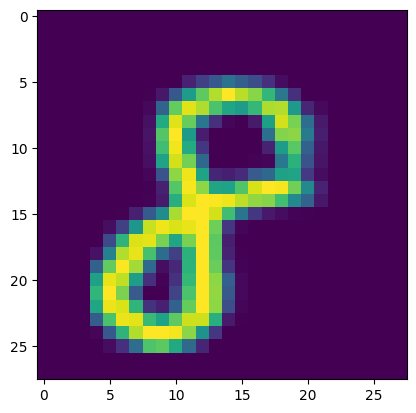

In [ ]:
plt.imshow(img_array.squeeze())

Load the Trained Model

In [8]:
model = load_model('/content/adversarial_model_kaggle.keras')

Predict on Clean Handwritten number

In [ ]:
prediction = model.predict(img_array.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Display Prediction

In [ ]:
print(f"The written number is {np.argmax(prediction)}")

The written number is 8


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Load Classifier for ProjectedGradientDescent

In [9]:
classifier = TensorFlowV2Classifier(
    model = model,
    input_shape = (28,28,1),
    nb_classes = 10,
    loss_object=SparseCategoricalCrossentropy(),
    train_step=None
)

Create ProjectedGradientDescent Instance

In [12]:
pgd = ProjectedGradientDescent(
    estimator=classifier,
    eps=0.1,
    eps_step=0.01,
    max_iter=40
)

In [13]:
x_test_adv = pgd.generate(x=x_test)

PGD - Batches: 0it [00:00, ?it/s]

In [14]:
test_loss_adv, test_accuracy_adv = model.evaluate(x_test_adv, y_test)
print(f"Test accuracy on adversarial data: {test_accuracy_adv:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.8332 - sparse_categorical_accuracy: 0.6985
Test accuracy on adversarial data: 0.7154


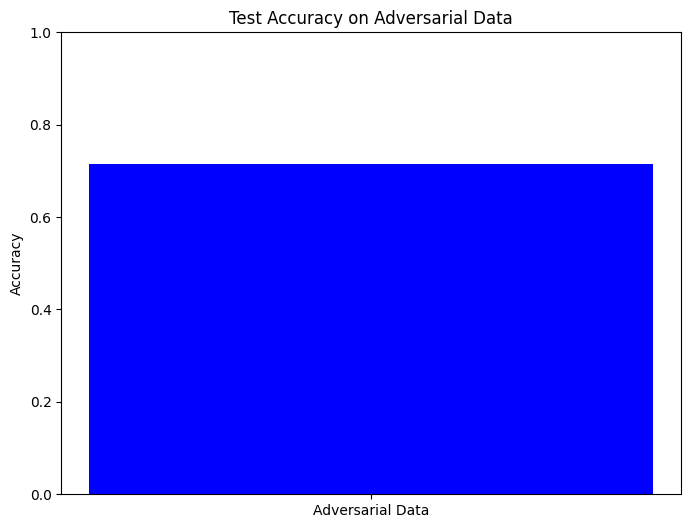

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(['Adversarial Data'], [test_accuracy_adv], color='blue')
plt.ylim(0, 1)
plt.title('Test Accuracy on Adversarial Data')
plt.ylabel('Accuracy')
plt.show()

Create a poisoned image from the clean image

In [ ]:
sample_poisoned_image = pdg.generate(img_array.reshape(1,28,28,1))

PGD - Batches: 0it [00:00, ?it/s]

Display the poisoned Image

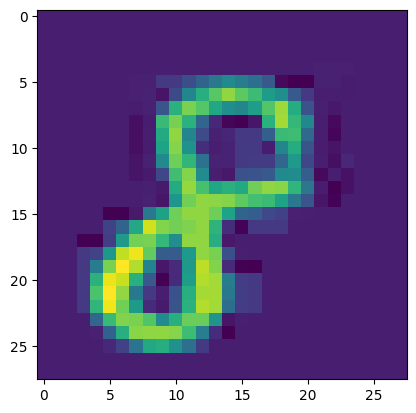

In [ ]:
plt.imshow(sample_poisoned_image.squeeze())

Make Poisoned Image Prediction

In [ ]:
poisoned_prediction = model.predict(sample_poisoned_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Display Prediction

In [ ]:
print(f"The written number is {np.argmax(poisoned_prediction)}")

The written number is 8
